**Coursebook: Classification Model**
- Part 5 of Python Fundamental Course
- Course Length: 24 Hours
- Last Updated: July 2019

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

The coursebook is part of the **Python Fundamentals Course** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

# Classification in Machine Learning

## Training Objectives
In this workshop, we'll extend our understanding of regression algorithms and see what we've learned in the previous workshop can be extended to solve a different kind of problems: classification problems. More specifically, we'll learn to solve binary and multi-class classification models using machine learning algorithms that are easily understood and in the case of logistic regression, readily interpretable. 

You will learn to develop classification algorithms from scratch, and investigate the mathematical foundations underpinning logistic regressions and nearest neighbors algorithms. My objective is to deliver a 9-hour session that is packed with the depth to help you develop, apply, score and evaluate two of the most highly versatile algorithms widely used today.

- **Logistic Regression**
    - Understanding Odds  
    - Log of Odds  
    - Logistic Regression in Practice  
    - Assumption and Limitation
- **Nearest Neighbors Prediction**
    - Calculating distance  
    - KNN from Scratch
    - Non parametric model
- **Model Evaluation**  
    - Cross Validation  
    - Bias variance trade-off  
    - Confusion matrix  
    
By the end of this course, you'll be working on a **Learn-by-Building** module to create a data exploratory analysis project to apply what you have learned on provided dataset and attempt to answer all the given questions. This final part is considered as a Graded Assignment so make sure you do well on the assignment.

Before going into our main topic for this coursebook, let's import the packages we are going to use:

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

## Logistic Regression
### Theory
Logistic regression is a classification algorithm used to fit a regression curve, $y = f(x)$, where $y$ is a categorical variable. When $y$ is binary (1 for spam, 0 for not-spam) we also call the model **binomial logistic regression** where in cases of $y$ assuming more than 2 values you'll sometimes hear the model being referred to as a class of **multinomial logistic regression**. We can think of logistic regression as a special case of linear regression (which you've mastered in the previous workshop), except we're using **log of odds** as our target variable. 



### Relation to Probability
So it's perhaps important to understand what odds mean. Most of us are familiar with **probabilities**. We understood that the **probability** of an event is the proportion of times it will occur divided by the total number of trials. If an event occurs 1 out of 5 times, then the probability (`p`) would be 1 out of 5, or 0.2. 

Odds are defined as the probability that an event will occur (`p`) divided by the probability than the event will not occur (we'll call it `q`, which is the same as `1-p`). If p is 0.2, we will see that q is 0.8. Expressed in a formula, odds can then be defined as:  
$\frac{p}{(1-p)}$

Let's use a fun and real-life example. Supposed we were playing black jack (assuming the casino uses two decks on black jack) and the first card dealt is an Ace, the probability of the next card dealt to the dealer is a Ten is 31.07% (32 possible Tens out of 103 possibility). If we have to express it in odds and define p as 0.31, then our odds of the dealer being dealt a Blackjack (Ace + a Ten) is 0.31/(1-0.31), which brings it to 0.45 to 1. 

Note that if we have defined `p` as the probability of the Dealer **not having a Blackjack**, our odds would instead be 0.69/0.31, which brings us to 2.23 to 1. We can interpret this as "for every 2.23 times the dealer didn't get a blackjack, she would get 1 blackjack". Odds, as we so far understand it, refers to the ratio of favorable event (dealer doesn't get a blackjack) to the unfavorable event. 

**Quiz 1: Odds of flying on time vs suffering a departure delay**

Now to a less-fun but no less important example: airport delays. If I tell you that the probability of a minor departure delay occurring at a particularly busy airport (Soekarno-Hatta) on a festive holiday season is 0.2, what are the chances (expressed in odds) of you departing on time versus that of a departure delay. Recall the formula: 

$Odds = \frac{No-delay}{Delay}$

I hope you arrived at the right answer of 4 to 1, and intuitively interpret the situation as "we are 4 times more likely to depart on time than to be delayed". 

Odds are rather commonly used in some industry and in sports. In football and in horse racing, you'll often see betting odds expressed as fractions (e.g. 3/1 for a Germany win). In some academic writing or journalistic reporting, you may also see odds being expressed such as this: "the relative risk of a credit event with Financial Product A over Product B is 1.125". If you think about it, this is the same concept we've been talking about: odds. 

If it wasn't immediately clear, consider assigning some numbers to the above example:  
- Financial Product A has a 0.45 empirical probability of incurring a credit event  
- Financial Product B has a 0.4 empirical probability of incurring a credit event  

The odds is hence 0.45/0.4, or 1.125:1. 

#### Understanding log of odds
When we have a probability $p$, the log of odds (sometimes called the "log-odds") is simply the log of the odds ratio, which is:  
$log(p/(1-p))$


Odds ratios as we observe above, are just an alternate way of expressing probabilities. Let's say we have the probability of success as 0.8, then the probability of failure is 1 - 0.8 = 0.2. The odds of success are defined as the probability of success over the probability of failure, in our case the odds would be .8/.2 = 4. We can also say that the odds of success is hence 4 to 1. If the probability of success is .5, i.e 50-50, our odds of success is 1 to 1.

The transformation from probability to odds is a monotonic transformation, so the odds increases as the probability increase (however note that odds take a range of 0 to infinity):

(0, 10)

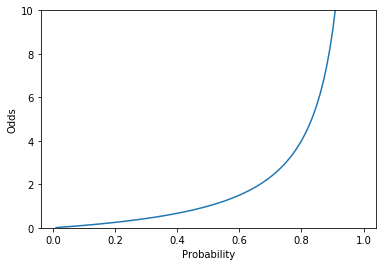

In [6]:
x = np.linspace(0.01, 0.99, 100)
y = x/(1-x)

plt.plot(x,y)
plt.ylabel('Odds')
plt.xlabel('Probability')
plt.ylim(0,10)

Notice how we have an **odd of 1 when our p is 0.5**, and our odd is 4, when p is 0.8, just as we learned from the earlier example (50:50 -> odds of 1, success rate of 0.8 -> odds of 4). 

Now that we've understood the transformation from probability to odds, let's understand the transformation from odds to logs of odds. 

Log of odds are:
$logit(p) = log(\frac{p}{1-p})$

Almost same code for the above curve, except this time we plot the curve of `log(x/(1-x))` instead of `(x/(1-x))`.

(-5, 5)

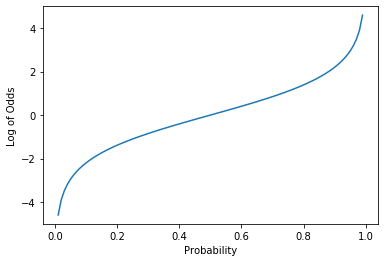

In [25]:
x = np.linspace(0.01, 0.99, 100)
odds = x/(1-x)
y = np.log(odds)

plt.plot(x,y)
plt.ylabel('Log of Odds')
plt.xlabel('Probability')
plt.ylim(-5,5)

Change `x` below from 0.5 to 1, and then to 0 to verify that the log of odds can take any positive or negative value (which is to say, its range is -Inf to Inf). A linear model can produce any value of log of odds and they would be acceptable as a prediction as the range is -Inf to Inf. That is not the case if a linear model has to produce a prediction that is a valid value of "probability", because a probability only takes a range of 0 to 1.

In [26]:
x = 0.5
math.log(x/ (1-x))

0.0

Again, the transformation of odds to log of odds is a monotonic one. The greater the odds, the greater the log of odds. However, recall that the probability of .5 will yield us a log-odds of 0. This is because the logit (log of odds) function takes values on [min, max] and transforms them to span [-Inf, Inf]. 5 is our median number and hence it's value on the log of odds scale is 0.

#### Understanding logit function

In the case of a p=0.5 on a scale of 0 to 1, our *p* would then be p = ( 0.5 - 0 ) / (1 - 0) = 0.5; In the case of a p=30 on a scale of 1 to 100, our *p* would subsequently take on the value of (30-1)/(100-1) = 0.292929293.


In [27]:
(30-1)/99

0.29292929292929293

In [30]:
math.log(0.2929293/(1-0.2929293))

-0.8811993779249543

Notice, however, that the logit function puts our probability on the x-axis instead of the y-axis and we can *invert* both axes also called the Sigmoidal **logistic function**.  

(0, 1)

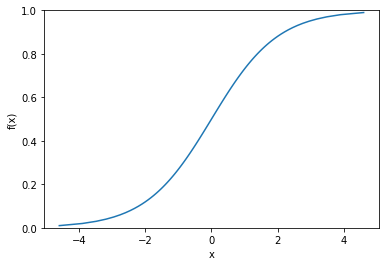

In [101]:
x = np.linspace(0.01, 0.99, 100)
odds = x/(1-x)
y = np.log(odds)

plt.plot(y,x)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.ylim(0,1)

You could be wondering by now why we're concerned with understanding these underlying concepts? It turns out that the reason is surprisingly straightforward if we approach it from our prior knowledge of linear regression models.  

Recall that with linear regression, we are used to representing our hypothesis in the following form:

$\hat{y} = \beta_0 + \beta_1x_1 + ... + \beta_mx_m$  
Where m is the number of predictors

But with that hypothesis, our value $\hat{y}$ could take on any value from *-Inf* to *Inf*. This is obviously not very helpful for our classification task. Ideally, we want:

$0 \leq \hat{y} \leq 1$  

This is because we can then set a threshold value, say 0.5, and classify any examples above 0.5 as a "positive" and any value below it as a "negative". Turns out, we can transform a simple linear regression model $\hat{y} = \beta_0 + \beta_1x_1$ by applying the sigmoid function, also known as the logistic function so we would end up with a hypothesis that bound our value to the range of 0 to 1:
$\hat{y}  = sigmoid( \beta_0 + \beta_1x_1)$
- where $\hat{y}$ = estimated probability that y=1 on input x.  

More formally:
$\hat{y} = P(y=1 | x;\theta)$

### [Optional] Extra Proof: Intuition behind the sigmoid function  
This sub-chapter sheds light on another perspective behind the sigmoid function, in the hope of helping you make sense of the sigmoid function a little more.

Starting from a simple linear regression example with an independent variable called "Age" (imagine predicting income based on age), we would have the following hypothesis:
$\hat{y} = \beta_0 + \beta_{Age}$

In logistic regression, since we are only concerned about the probability of our outcome (target), we need our hypothesis to be between 0 and 1:
$0 \leq \hat{y} \leq 1$

Recall that we can think of $\hat{y}$ simply as a probability of y being 1, we can denote it as $p$ for the purpose of convenience. Since probability must always be positive, we put this linear equation in exponential form, such that for any value of slope and dependent variable, exponent of this equation will never be negative:
$p = exp(\beta_0 + \beta_{Age}) = e^{(\beta_0 + \beta_{Age})}$

Exponenting something would make it an always positive value:

In [41]:
import math
math.exp(-14)

8.315287191035679e-07

Now that we've made the range our $p$ can take on 0 to positive infinity; We still have one task to do - we need to make our probability assume a range smaller than 1, essentially making it take on the range of 0 to 1. To make the probability lesser than 1, we will divide p by a number greater than p. 

> Divide 4 by 5 and get 0.8; or 4 by 20 and get 0.2, for an arithmetic proof  

So, back to making p lesser than 1:  
$p = \frac{exp(\beta_0 + \beta_{Age})} {exp(\beta_0 + \beta_{Age} + 1) }$

The above equation is of course equivalent to:
$\frac{e^{(\beta_0 + \beta_{Age})}}{e^{\beta_0 + \beta_{Age}+ 1)}}$

Putting all of these together, we can now rewrite the probability as:
$p = \frac{e^z}{(1 + e^z)}$

Where p is the probability of success (y=1) and `z` is the placeholder for $\beta_0 + \beta_{Age}$. `q`, the probability of failure, will then be:
$q = (1 - p) = 1 - \frac {e^z} {(1 + e^z )} $

Recalling what we know about *odds*, we can now define our odds as:
$\frac{p}{1-p}$  

Let's expand from the above equation:  
$\frac{p}{1-p}$  = $p * \frac{1}{(1-p)}$  
                 = $\frac{e^z}{1+e^z} * \frac{1}{1-\frac{e^z}{1+e^z}}$  
                 = $\frac{e^z}{(1+e^z) - (\frac{e^z * (1+e^z)}{1+e^z})}$  
                 = $\frac{e^z}{(1+e^z) - e^z}$  
                 = $\frac{e^z}{1}$  

So from the above odds equation $\frac{p}{1-p} = e^z$, we can take the log on both sides and obtain:  
$log(\frac{p}{1-p}) = z$

After substituting z for the actual hypothesis in our earlier linear regression example, we arrive at:
$log(\frac{p}{1-p}) = \beta_0 + \beta(Age)$

This, we learned earlier, is the equation used in logistic regression. It turns out that we arrive at the log of odds which we've studied in the previous section! 

Another important observation: realize that regardless of what value x takes, our probability of success (y=1) will always be on the range of 0 to 1. 


## Key Assumptions of Logistic Regression  
Many of the key assumptions of linear regression do not hold true with logistic regression. We've learned about the linearity assumption, normality of residuals, and homoskedasticity assumptions in our regression models class - they do not apply in the case of logistic regression.

Logistic regression **does not** require a linear relationship between the dependent and independent variables - it also does not assume normality of residuals nor is it concerned with the problem of heteroskedasticity the way that linear regressions are.

However, a few of the assumptions do apply:  
- **Multicollinearity**: Just as with the case of linear regression, logistic regression assumes little to no multicollinearity among the independent variables (recall how we used VIF to identify highly correlated variables in the last workshop)  
- **Independence of Observations**: The observations should not come from repeated measurements and are independent from each other  
- **Linearity of predictor and log odds**: While logistic regressions do not assume linearity between the dependent and independent variables, it does assume that the independent variables (predictors) are linearly related to the log odds.  

The first two points are rather self-explanatory, and the third will be illustrated to you in an example later (flight delay prediction). If put slightly differently, the third point stresses that a logistic regression models the logit-transformed probability as a linear relationship with the predictor variables.

## Binary Logistic Regression
Supposed you work in an education institution and are put in charge to evaluate the likelihood of a student graduating with a honors degree given their academic scores in a reading test, writing test and mathematics test.  

This dataset has four features: `female`, `read`, `write`, `math` and the target variable is `hon`, a binary feature with 1 indicating that the student is in fact in an honors class and 0 indicating otherwise. The dataset is credited to the UCLA: Statistical Consulting Group (see credits for link and details).

In [31]:
honor = pd.read_csv("data_input/sample.csv")
honor.head()

,female,read,write,math,hon,femalexmath
0,0,57,52,41,0,0
1,1,68,59,53,0,53
2,0,44,33,54,0,0
3,0,63,44,47,0,0
4,0,47,52,57,0,0


### Logistic Regression with Discrete Predictor Variables

To fully understand logistic regression, let's begin by looking at our `honor` proportion:

In [90]:
honor.hon.value_counts()

0    151
1     49
Name: hon, dtype: int64

Our odds ratio, without the influence of any predictor variable, is 49 out of 200 (49 in honors classes vs 151 not), so that give us a probability of 49/200, p = 0.245. Our odds ratio is therefore 0.245/(1-0.245) = 0.3245033

Before we attempt to interpret the parameters estimated from our model above, let's examine the odds ratio of a female being in a honors class as we did before:

In [67]:
pd.crosstab(honor.hon, honor.female)

female,0,1
hon,,
0,74,77
1,17,32


- For males: odds of being in honors class = (17/91)/(74/91) = 0.2297297  
- For females: odds of being in honors class = (32/109)/(77/109) = 0.4155844  
- The ratio of the odds for female vs ratio of the odds for male = .42/.23 = 1.809, which is to say that the odds for female being in an honors class are about 81% more than that of their male counterpart  

Let's now add one binary predictor variable, **female** to the model, such that the equation for our model is formally described as:
$logit(p) = \beta_0 + \beta_1 * female$


In [102]:
import statsmodels.api as sm

honor['intercept'] = 1

logit_model_female = sm.Logit(honor.hon, honor[['female','intercept']]).fit()
logit_model_female.summary()

Optimization terminated successfully.
         Current function value: 0.549016
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                 0.01394
Time:                        10:26:36   Log-Likelihood:                -109.80
converged:                       True   LL-Null:                       -111.36
Covariance Type:            nonrobust   LLR p-value:                   0.07811
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
female         0.5928      0.341      1.736      0.083      -0.076       1.262
intercept     -1.4709      0.269     -5.469      0.000      -1.998      -0.944
==============================================================================
"""

Let's now relate the odds ratio to the output from the logistic regression model with our `female` predictor variable.

In [85]:
math.exp(-1.4709)

0.2297186453419476

The intercept of **-1.4709** is the log odds for males since male is the reference group (**female** = 0). If we have wanted to confirm this, we can manually calculate this using the odds ratio for the male group:

In [91]:
round(math.log((17/91)/(74/91)),4)

-1.4709

The coefficient for **female** is the log of odds ratio between the female group and the male group, which can be manually calculated:

In [95]:
odds_males = (17/91)/(74/91)
odds_females = (32/109)/(77/109)
odds_ratio = odds_females/odds_males

round(math.log(odds_ratio),4)

0.5928

Using what we've learned earlier, we also know how easy it would be for us to calculate the odds ratio from the output of the model's summary: we simply have to exponentiate the coefficient it gives us for female. 

And if we were to relate this back to the original equation:
$logit(p) = \beta_0 + \beta_1 * female$

- For a male (female = 0): we would substitute the values into the equation and arrive at logit(p) = -1.4709  
- For a female (female = 1): we would instead get logit(p) = -1.4709 + (0.5928*1) = -0.8781  

> The ratio of the odds for female vs ratio of the odds for male = .42/.23 = 1.809, which is to say that the odds for female being in an honors class are about 81% more than that of their male counterpart  

Notice how this is the same answer we derive from our manual calculation even before looking at the output of our logistic regression model. In fact, we could as well have taken the **estimated coefficient** value for `female`.

### Logistic regression with one continuous predictor variable
Let's try another exercise, this time using the `math` score (continuous variable) such that the equation for our model is formally described as:

$logit(p) = \beta_0 + \beta_1 * math$

In [104]:
logit_model_math = sm.Logit(honor.hon, honor[['math','intercept']]).fit()
logit_model_math.summary()

Optimization terminated successfully.
         Current function value: 0.417683
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                  0.2498
Time:                        10:26:51   Log-Likelihood:                -83.537
converged:                       True   LL-Null:                       -111.36
Covariance Type:            nonrobust   LLR p-value:                 8.718e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
math           0.1563      0.026      6.105      0.000       0.106       0.207
intercept     -9.7939      1.482     -6.610      0.000     -12.698      -6.890
==============================================================================
"""

Notice in the case of a continuous variable such as the math score, our estimated coefficient for the intercept is the log odds of a student with a math score of zero being in an honors class. If we mentally visualize a plot with both x and y axis, this makes intuitive sense: the intercept points to the value of y **when our x feature = 0**. By taking the exponent of this value, we then know the odds of such student being in an honors class:

In [106]:
math.exp(-9.7939)

5.579088796666687e-05

These odds are very low, and a peek at the distribution for the variable math will reveal that no one in the sample has a math score lower than 30 (mean of 53 in fact), which tells us that the intercept in this model corresponds to the log odds of being in an honors class when math is at the hypothetical value of zero.

How do we interpret the coefficient for math? Recall our equation:

$logit(p) = log(p/(1-p)) = \beta_0 + \beta_1 * math$

With the substituted values:
logit(p) = -9.7939 + 0.1563 * math

In [111]:
honor['math'].describe()

count    200.000000
mean      52.645000
std        9.368448
min       33.000000
25%       45.000000
50%       52.000000
75%       59.000000
max       75.000000
Name: math, dtype: float64

The median of math is 52. Let's assume a `math` value of 52:
logit(p) = -9.7939 + 0.1563 * 52 = -1.66426

Examine the effect of a one-unit increase in math score, at 53:
logit(p) = -9.7939 + 0.1563 * 53 = -1.50792

Taking the difference:
-1.50792 - (-1.66426) = 0.15634

In [123]:
round(-1.50792 -(-1.66426),5)

0.15634

In [122]:
round(logit_model_math.params['math'], 5)

0.15634

...and it is! So the coefficient for `math` is in fact the difference in the log odds for one unit of increment in that variable (math score of 53 vs 52). In simpler words, for one-unit increase in the math score, the expected change in log odds is 0.15634.

Like the earlier example, we could also translate this change in log odds to the change in odds by exponentiating the log-odds:

Change in Odds  = odds(math=53) / odds(math=52)  
                = exp(-1.50792) / exp(-1.66426)  
                = odds (difference in one-unit increase)  
                = exp(0.15634)  
                = 1.169224  

In [118]:
math.exp(-1.50792)/math.exp(-1.66426)

1.1692236715647317

In [119]:
math.exp(logit_model_math.params['math'])

1.1692240873242836

We interpret this as: for a one-unit increase in math score, we expect to see ~17% increase in the odds of being in an honors class. This 17% does not depend on the value that math is held at. It's also important to note that a 17% increase in odds is not the same as a 17% increase in probability. All it is saying that compared to a score of 52, scoring 53 will improve the odds of being in an honors class by 1.17 times.

### Logistic regression with multiple predictor variables and no interaction terms
In general, we can have multiple predictor variables in a logistic regression model:
logit(p)        = log(p/(1-p))  
                = $\beta_0 + \beta1 * x1 + ... + \beta_k *xk$  
                
Applying such a model to our example dataset, each estimated coefficient is the expected change in the log odds of being in an honors class **for a one-unit increase in the corresponding predictor variable** holding the other variables constant at a certain value. Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a one-unit increase in the corresponding predictor variable holding other variables at a certain value. Let's look at the following equation:

$logit(p) = \beta_0 + \beta_1 * math + \beta_2 * female + \beta_3 * read$

In [126]:
model_logit_multi = sm.Logit(honor.hon, honor[['female', 'math', 'read','intercept']]).fit()
model_logit_multi.summary()

Optimization terminated successfully.
         Current function value: 0.390424
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hon   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                  0.2988
Time:                        10:34:24   Log-Likelihood:                -78.085
converged:                       True   LL-Null:                       -111.36
Covariance Type:            nonrobust   LLR p-value:                 2.348e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
female         0.9799      0.422      2.324      0.020       0.154       1.806
math           0.1230      0.031      3.931      0.000       0.062       0.184
read           0.0591      0.027      2.224      0.026       0.007       0.111
intercept    -11.7702      1.711     -6.880      0.000     -15.123      -8.417
==============================================================================
"""

The coefficient for *math* tells us that, holding *female* and *reading* at a fixed value, we will see a 13% increase in the odds of graduating with honors class for a one-unit increase in math score since exp(.12296) = 1.13. 

**Discussion:**

Can you attempt to interpret the above model and answer the following question?

- Holding Female and Mathematics score constant, a one-unit increase in reading score improves the odds of graduating with honors by how much?

In [128]:
# Your code here

### Extra Example: Predicting Flight Delay
Let's take a look at what happened when we try to predict flight delays using a logistic regression models where the predictor variables are `Month`, `DayofMonth`, and `DayofWeek` respectively.

In [130]:
flight = pd.read_csv("data_input/flight_sm.csv")
flight.head()

,Year,Month,DayofMonth,DayofWeek,Carrier,CRSDepTime,DepDel15,CRSArrTime,OriginState,DestState
0,2013,9,16,1,DL,1539,0,1824,FL,NY
1,2013,9,23,1,WN,1400,1,1425,PA,IL
2,2013,9,7,6,AS,810,0,1614,WA,DC
3,2013,7,15,1,OO,804,0,1027,IL,OH
4,2013,5,16,4,DL,805,0,1117,NY,FL


In [132]:
flight['intercept'] = 1

logit_flight = sm.Logit(flight.DepDel15, flight[['Month', 'DayofMonth', 'DayofWeek', 'intercept']]).fit()
logit_flight.summary()

Optimization terminated successfully.
         Current function value: 0.501818
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               DepDel15   No. Observations:               538363
Model:                          Logit   Df Residuals:                   538359
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                0.002427
Time:                        10:37:01   Log-Likelihood:            -2.7016e+05
converged:                       True   LL-Null:                   -2.7082e+05
Covariance Type:            nonrobust   LLR p-value:                1.116e-284
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Month         -0.0610      0.002    -35.512      0.000      -0.064      -0.058
DayofMonth     0.0026      0.000      6.668      0.000       0.002       0.003
DayofWeek     -0.0048      0.002     -2.824      0.005      -0.008      -0.001
intercept     -0.9747      0.015    -64.570      0.000      -1.004      -0.945
==============================================================================
"""

There is a problem with the above logistic regression model: Can you tell which among the three key assumptions did it violate?
- Multicollinearity  
- Independence of Observations  
- Linearity of predictor and log odds  

### Application of Logistic Regression
In the field of market research where its commonplace for business analysts to try and get as accurate as possible a prediction of a new product launch (success/failure), a new bundle pricing strategy (odds of success / odds of failure), or a new enrollment plan, logistic regression and its accompanying analysis plays a pivotal role. An example of this is the scenario of a company that is estimating the change of probability / odds of customer buy-in for every $1 dollar change in price. Another example of this is in election forecasts: where a campaign manager is trying to determine the odds of a likely voter to vote for a particular candidate, using demographic parameters such as gender, age, and education level. 

Another common use of logistic regression in business is in building models of customer retention, which can offer incredible insights into why some customers leave and others stay (drivers of customer retention). This is particular important in certain industries, where reducing customer defections by as little as five percent can double profits (Reichheld, 1996)

Interesting weekend read: Another interest project that models customer retention using historical data from a database (more than 500,000 clients) of a big mutual fund investment company and logistic regression (Eiben, Euverman, Kowalczyk, Slisser), which highlight the benefits of an interpretative model like the one we obtain with logistic regression.

Yet another example is in Credit Risk Analysis, where machine learning is deployed to estimate probability of defaults (or in the measurement of other types of credit risk). The paper described how loan officers at bank use logistic regression "to identify characteristics that are indicative of people who are likely to default on loans, and then use those characteristics to discriminate between good and bad credit risks".

A quick summary of the findings:  
- Number of years at current employment and number of years at current address have negative coefficients, indicating that customers who have spent less time at either their current employer or their current address are more likely to default  
- Debt-to-income ratio (`dti`, a measurement we'll use in our project later) and amount of credit card debt both have positive coefficients, indicating that higher dti ratios or higher amounts of credit card debts are both associated with a greater likelihood of loan defaults.  

[Reichheld, F.F. (1996)., Learning from Customer Defections, in Harvard Business Review,march-april](https://hbr.org/1996/03/learning-from-customer-defections)
[Modelling Customer Retention with Statistical Techniques, Rough Data Models, and Genetic Programming.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.55.7177&rep=rep1&type=pdf)
[Modelling telecom customer attrition using logistic regression](https://academicjournals.org/article/article1379926496_Oghojafor%20et%20al.pdf)
[Credit Risk Analysis Using Logistic Regression Modeling](http://smartdrill.com/pdf/Credit%20Risk%20Analysis.pdf)

### Credit Risk Analysis / Modeling: Loans from Q4 2017
I've prepared the following data originally made available by [LendingClub](https://www.lendingclub). Some preprocessing steps have been applied to save you from the "data cleansing" work. We'll read the data into our workspace:

In [134]:
loan = pd.read_csv("data_input/loan2017Q4.csv")
loan.head()

,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,w,debt_consolidation,14.08,675.99,156700.0,19.11,Source Verified,C,21936,3,0,MORTGAGE,0,11.962088,1,0
1,f,debt_consolidation,9.44,480.08,50000.0,19.35,Not Verified,B,5457,1,1,RENT,1,10.819778,0,1
2,w,debt_consolidation,28.72,1010.30,25000.0,65.58,Verified,F,23453,0,0,OWN,1,10.126631,1,0
3,w,debt_consolidation,13.59,484.19,175000.0,12.60,Not Verified,C,31740,0,0,MORTGAGE,1,12.072541,0,0
4,w,major_purchase,15.05,476.33,109992.0,10.00,Not Verified,C,2284,3,0,MORTGAGE,0,11.608163,0,0


The variable of interest is the `not_paid` variable, a binary variable that indicate whether a loan is fully paid or not. A loan is considered "not paid" (not paid = 1) when it is **Defaulted**, **Charged Off**, or past due date (**Grace Period**). To prevent one class from dominating the other, the data I've prepared here over-sampled more "bad" loans so that the underlying characteristics of the empirically minority class is adequately represented.  

In [135]:
loan.not_paid.value_counts()

1    778
0    778
Name: not_paid, dtype: int64

What's important to note is that logistic regression is not susceptible to a "class imbalance" problem per-se, and an unbalanced class representation is for the most part dealt with as sample size grows anyway. That said, in the situation of highly imbalanced class representation, the patterns within the minority class may not be sufficiently "described" and in the case of an extreme imbalance you may be better off using an "anomaly detection" approach than through a classification approach.

Let's study the dataset we've just read into our environment:  
- `initial_list_status`: Either `w` (whole) or `f` (fractional). This variable indicates if the loan was a whole loan or fractional loan. For background: Some institutional investors have a preference to purchase loans in their entirety to obtain legal and accounting treatment specific to their situation - with the added benefit of "instant funding" to borrowers  
- `purpose`: Simplified from the original data; One of: `credit_card`, `debt_consolidation`, `home_improvement`, `major_purchase` and `small_business`  
- `int_rate`: Interest rate in percentages  
- `installment`: Monthly payment owed by the borrower  
- `annual_inc`: Self-reported annual income provided by the borrower / co-borrowers during application  
- `dti`: A ratio of the borrower's total monthly debt payments on his/her total obligations to the self-reported monthly income  
- `verification_status`: is the reported income verified, not verified, or if the income source was verified  
- `grade`: software-assigned loan grade  
- `revol_bal`: total credit revolving balance (in the case of credit card, it refers to the portion of credit card spending that goes unpaid at the end of a billing cycle)  
- `inq_last_12m`: number of credit inquiries in the last 12 months  
- `delinq_2yrs`: number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years  
- `home_ownership`: one of `MORTGAGE`, `OWN` and `RENT`  
- `not_paid`: 1 for fully-paid loans, 0 for charged-off, past-due / grace period or defaulted  
- `log_inc`: log of `annual_inc`  
- `verified`: 0 for "Not verified" under `verification_status`, 1 otherwise  
- `grdCtoA`: 1 for a `grade` of A, B or C, 0 otherwise

Before we dive into building our classification model, I'd like to encourage you to spend some time on the "exploratory phase".

**Dive Deeper:**

This is the phase where you investigate the relationships and discover rough structures of the data. You can use pivot tables, histogram, and any of the techniques we have learned in the previous weeks to get a better sense about your data. Take your time to write a few more lines and be always be curious about your data!

In [136]:
# Your code here

### Cross-Validation and Out-of-Sample Error
Before we develop our classification model, I'll introduce you to the idea of estimating the accuracy of our model. Simply put, we are going to:  
- Split our dataset into train and test sets  
- Build our machine learning model using data **only** from our train set  
- Obtain an unbiased measurement of the model's accuracy by predicting on test set  

A related idea is known as **cross-validation**, in which we:  
- Split our dataset into train, cross-validation, and test sets  
- Develop the initial model using our train set  
- Evaluate model on cross-validation set(s), returning to the previous step if necessary (say, pick different predictor variables, use a different parameter, or to tune other aspects of the model specification)  
- Pick a final model based on an evaluation criteria (Adj.R-squared, accuracy, etc)  
- Obtain an unbiased measurement of the model's accuracy by predicting on test set  

We can repeat step(2) and step(3) as much as is necessary, testing out different algorithms or model specification, or combinations of predictor variables and pick a final model on which we will obtain our estimated accuracy by testing it on the test set. An important rule on this is that the **test set must not be used in any of the steps before the (5)**, such that the accuracy we obtain is an unbiased measurement of the out-of-sample accuracy of the model. 

The idea of obtaining an unbiased estimate of our model's out-of-sample performance is an important one as it is often the case that the in-sample error (the error you obtain from running your algorithm on the dataset it was trained on) is optimistic and tuned / adapted in a particular way to minimize the error in the training sample. Therefore - the in-sample error is not a good representation or indication of how our model will perform when it is applied on unseen data. 

Another way to think about is that our training data has two components to it: signal and noise. The goal of machine learning is to identify the signal but be robust enough to avoid modeling the "noise" component of the data. When we build a model, we want to know that our model is not overly adapted to the data set to the point that it captures both the signal and noise, a phenomenon known as "overfitting". When our model is guilty of overfitting, the in-sample accuracy will be very high (in some cases ~100%) but fail to perform on unseen data. The idea is to strike the right balance between accuracy (don't underfit) and robustness to noise (don't overfit).  

To continue let's talk about one more important thing: data types.

In [187]:
loan_selected = loan[['verified', 'purpose', 'installment', 'int_rate', 'home_ownership', 'grdCtoA', 'annual_inc', 'not_paid']]

loan_selected.dtypes

verified            int64
purpose            object
installment       float64
int_rate          float64
home_ownership     object
grdCtoA             int64
annual_inc        float64
not_paid            int64
dtype: object

As we can see, purpose, and home_ownership is stored as an `object` types since both are a categorical value. We need to transform it into a dummy variables:

In [188]:
cat_columns = ['purpose', 'home_ownership']

loan_dummy = loan_selected.copy()
for col in cat_columns:
    cat_list = pd.get_dummies(loan_dummy[col], prefix=col)
    loan_dummy = loan_dummy.join(cat_list)

loan_selected = loan_dummy.select_dtypes(include=['number'])

Next, let's proceed to splitting our data into a train and test set. To do that we can use `pandas` useful `train_test_split`:

In [189]:
from sklearn.model_selection import train_test_split

x = loan_selected.drop(['not_paid'], axis=1)
y = loan_selected['not_paid']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1244, 13)
(1244,)
(312, 13)
(312,)


### Predicting Credit Risk from Loans


We already know how to build a binomial logistic regression and learned the "manual" way of obtaining those coefficients in previous sections. In this section we'll cut into the chase and proceed using `Logit()` function:

In [190]:
logit_loan = sm.Logit(y_train, x_train).fit()
logit_loan.summary()

Optimization terminated successfully.
         Current function value: 0.658551
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               not_paid   No. Observations:                 1244
Model:                          Logit   Df Residuals:                     1232
Method:                           MLE   Df Model:                           11
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                 0.04977
Time:                        11:23:25   Log-Likelihood:                -819.24
converged:                       True   LL-Null:                       -862.14
Covariance Type:            nonrobust   LLR p-value:                 1.097e-13
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
verified                       0.1692      0.125      1.348      0.178      -0.077       0.415
installment                    0.0011      0.000      4.935      0.000       0.001       0.002
int_rate                       0.0155      0.016      0.985      0.325      -0.015       0.046
grdCtoA                       -0.4187      0.181     -2.312      0.021      -0.774      -0.064
annual_inc                 -3.485e-06   1.16e-06     -3.001      0.003   -5.76e-06   -1.21e-06
purpose_credit_card           -0.3850   6.61e+06  -5.82e-08      1.000    -1.3e+07     1.3e+07
purpose_debt_consolidation    -0.1569   6.61e+06  -2.37e-08      1.000    -1.3e+07     1.3e+07
purpose_home_improvement      -0.1895   6.61e+06  -2.87e-08      1.000    -1.3e+07     1.3e+07
purpose_major_purchase         0.0350   6.61e+06   5.29e-09      1.000    -1.3e+07     1.3e+07
purpose_small_business         0.3203   6.61e+06   4.84e-08      1.000    -1.3e+07     1.3e+07
home_ownership_MORTGAGE       -0.3290   6.61e+06  -4.97e-08      1.000    -1.3e+07     1.3e+07
home_ownership_OWN             0.0742   6.61e+06   1.12e-08      1.000    -1.3e+07     1.3e+07
home_ownership_RENT           -0.1214   6.61e+06  -1.83e-08      1.000    -1.3e+07     1.3e+07
==============================================================================================
"""

We observe from the model summary that holding other variables constant, obtaining an assigned grade of A to C reduce the log-odds (because it's a negative coefficient) of a loan default; Now let's use the `predict()` function, specifying the:  
- Model to be used for prediction (`logit_loan`)  
- Dataset on which the model should predict (`x_test`)

In [202]:
# code of predict value from model
prediction = logit_loan.predict(x_test)

prediction.describe()

count    312.000000
mean       0.491621
std        0.126984
min        0.091605
25%        0.396420
50%        0.488220
75%        0.582834
max        0.826921
dtype: float64

The prediction results range from 0 to 1 describing the probability of someone not paying back a loan for each test data. We can therefore set a "risk" threshold, say, at 0.5 and predict any loans that exceed that threshold as a "default=1". 0.5 may not always be the right threshold setting and we'll discuss that later in the section describing "precision" vs "recall". 

In [208]:
pd.crosstab(round(prediction), y_test)

not_paid,0,1
row_0,,
0.0,91,69
1.0,74,78


This table above is also known as the **confusion matrix**. 

Observe from the confusion matrix that: 
- Out of the 147 actual defaults we classified 91 of them correctly  
- Out of the 165 fully-paid loans we classified 78 of them correctly  
- Out of the 312 cases of loans in our test set, we classified 169 of them correctly

#### Exercise: Prediction Output
As an exercise, are you able to append yet another variable (column) to the above `x_test`. Name it `prediction` and make sure it's a binary (0 or 1).

In [203]:
# Your code here

### Evaluating Classifiers: Sensitivity, Specificity and Precision
Sensitivity and specificity are metrics commonly used to measures the performance of a binary classification.  

- Sensitivity (also called the true positive rate, the **recall**, or probability of detection in some fields) measures the proportion of positives that are correctly identified as such (cancer cell detection, email spam, insurance fraud etc)  
- Specificity (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g. the percentage of healthy people who are correctly identified as not having the condition, legitimate emails identified as such, legitimate insurance claims)  
- Precision: Proportion of correctly identified positives from all classified as such  
- Accuracy: Proportion of correctly identified cases from all cases 

![Source: Wikipedia](assets/sensitivity.png)

**Discussion:**

Given the confusion matrix, can you describe the precision, recall, and accuracy of our model?

In [220]:
pd.crosstab(round(prediction), y_test)

# Your code here

not_paid,0,1
row_0,,
0.0,91,69
1.0,74,78


In [217]:
78/(78+69)

0.5306122448979592

We can also use `scikit-learn` to help us calculate it:

In [222]:
from sklearn.metrics import recall_score, precision_score

print(f'Precision score: {precision_score(y_test, round(prediction))}')
print(f'Recall score: {recall_score(y_test, round(prediction))}')

Precision score: 0.5131578947368421
Recall score: 0.5306122448979592


Sometimes, you'll also find machine learning applications that uses the notion of a baseline measure in their model evaluation phase. The baseline performance is used to quantify the improvement of an applied solution to the problem and a **base rate** is just the accuracy of trivially predicting the most-frequent (or majority) class.

In [223]:
loan_selected.not_paid.value_counts()

1    778
0    778
Name: not_paid, dtype: int64

Since our initial proportion is balanced - a classifier that does no better than 0.5 is not useful because we might as well have classify every class to the majority! 

False negatives and false positives are rarely equally costly to a business (or really, to any domain). For an insurance company, a false negative on an insurance payout is likely to cost the company more than a false positive for example. Finding the right precision-recall tradeoff comes with domain expertise - and let's make all of these more concrete by extending our credit risk example above.

Say the bank's credit department would rather sacrifice some level of specificity or precision in favor of higher recall (or sensitivity). In simpler words, we want to be more sensitive to "loan defaults", how would you go about doing that? Try and think critically of the problem before scrolling down to the proposed solution.

Well, one thing we can do is to set the threshold to be more sensitive to "positive cases": Let's see what happen if we were to predict a "default" when the probability exceed 0.4 (20% more sensitive than our previous classifier): 

In [228]:
prediction_threshold = prediction.apply(lambda x: 1 if x > 0.4 else 0)

pd.crosstab(prediction_threshold, y_test)

not_paid,0,1
row_0,,
0,53,27
1,112,120


In [229]:
print(f'Precision score: {precision_score(y_test, prediction_threshold)}')
print(f'Recall score: {recall_score(y_test, prediction_threshold)}')

Precision score: 0.5172413793103449
Recall score: 0.8163265306122449


We increased our Sensitivity or Recall rate from 0.53 to above 0.8! What is the cost of such an adjustment?

## K-Nearest Neighbour Algorithm

The k-nearest neighbor algorithm gets it name from the fact that it uses information about an example's k-nearest neighbors to classify unlabeled examples. Upon choosing _k_, the algorithm requires a training dataset made up of examples that have been classified into several categories, as labeled by a nominal variable. Then, for each unlabeled record in the test dataset, k-NN identifies _k_ records in the training data that are the "nearest" in similarity. The unlabeled test instance is assigned the class of the majority of the k-nearest neighbors.  

Supposed we pick k=1, then the * in the following feature space will be assigned the square class, but if k=5, then the majority class of the five nearest point will be assigned to that point and our point will be classified as a round instead.

![ ](assets/knn.jpg)

With that we would then use a *distance function* to find data point's nearest neighbors. Traditionally, the k-NN algorithm assumes *Euclidean distance*, which is the shortest direct route (imagine using a ruler to connect two points). While Euclidean distance function is the most widely used distance metric in k-NN, you will sometimes see the Manhattan distance (which is based on the paths a pedestrian would take by walking city blocks) being used instead [^5]. 

While these distance functions exist, Euclidean distance is far more often seen in industrial applications and is therefore the focus of this chapter.

### Euclidean Distance  
Let A and B be represented by feature vectors A = ($x_1, x_2, …, x_m$) and B = ($y_1, y_2, …, y_m$), where _m_ is the dimensionality of the feature space. To calculate the distance between A and B, the Euclidean Distance formula can be represented as such:

dist(A, B) = $\sqrt{\sum\limits^{m}_{i=1}(x_i-y_i)^2}$

Applying the above formula on our blind-tasting example, we can calculate the distance between:  
- tomato (sweet: 6, crunchy: 4)  
- green bean (sweet: 3, crunchy: 7)

dist(tomato, greenbean) = `sqrt((6-3)^2 + (4-7)^2))`, which is 4.24


### Choosing an appropriate *k*
The decision of how many neighbors to use for k-NN determines how well the model will generalize to future data. The balance between overfitting and underfitting the training data is a problem known as **bias-variance tradeoff**. Choosing a large k reduces the impact or variance caused by noisy data, but can bias the learner so that it runs the risk of ignoring small, but important patterns.

If we use a very large k, say, a k value as large as the total number of observations in the training data, this would lead to the always predicting the majority class, which we've learned about in the previous chapter.

On the opposite extreme, using a single nearest neighbor allows the noisy data or outliers to unduly influence the classification of examples. If one of our training examples were accidentally mislabeled and happens to be a neighboring data point, choosing a k=1 will have resulted in a misclassification, even if the nine other nearest neighbors would have voted differently.

![](assets/biasvariance.png)

In practice, one common strategy is to begin with *k* equal to the square root of the number of training examples. Another strategy is to choose a larger k but apply a weighted voting process in which the vote of the closer neighbors is considered more authoritative than the vote of the farther away neighbors.

### Features rescaling
Supposed, in addition to Sweetness and Crunchiness, we add a new feature "Spiciness" which is measured on a scale of 0 to 10,000. This range, or difference in scale, will allow the spice level of a food to have an amplified impact on the distance function. In fact, it's enlarged contribution to the distance function may end up being the singular decisive feature! 

We solve this by rescaling the features, i.e shrinking or expanding their range so that each feature's contribution to the distance formula is equally weighed. We want spiciness to be measured on the same scale as sweetness and crunchiness, which is a scale from 1 to 10. The two methods of rescaling features are: 

- Mix-Max normalization  
- z-score standardization  

**Min-max normalization** works by transforming a feature such that its values fall into a range of 0 to 1. 

The formula: $x_{new} = \frac{(x-min(x))} {(max(x) - min(x))}$

- Which essentially subtracts the min of feature *x* from each value and divides by the range of *x*.

Normalized feature's values effectively communicates how far, in percentage terms, the original value fell along the range of all values of feature *x*.

**z-score standardization** on the other hand subtracts the mean value of feature *x* and divides the outcome by the standard deviation of *x*.  

The formula: $x_{new} = \frac{(x-\bar x)}{std(x)}$  

Standardization rescales each of the feature's values in terms of how many standard deviations they fall above or below the mean values. The resulting value is called a *z-score*. Z-scores has no predefined bounds (minimum and maximum) and may be negative or positive numbers. A more detailed discussion of this is in the Practical Statistics coursebook you have received in an earlier workshop.

### Characteristics of k-NN
Classification methods using k-NN are called 'lazy learners'. Lazy learners do not build a model; There is no abstraction or generalization process -- compare this to the logistic regression method we've learned earlier to have an intuition of what 'building a model' means. More technically, we say that no 'parameters' are learned about the data.

Let's summarize the process that goes into prediction with a k-NN classifier:  
- Scaling (putting the variables on a same scale to avoid one variable overpowering the others)  
- Select a positive integer *k*  
- Select the _k_ nearest neighbor for each "test" sample  
- Classify based on majority class

Because k-NN makes prediction in a manner that is "just-in-time" by calculating the similarity between each input sample and the other training samples in the vector space, this method may be computationally expensive on dataset with high dimensionality (high memory requirement and constantly calculating "distances" over and over again). If we pick a small *k* value, our algorithm may also be vulnerable to the "noise" in our data. On its own, it is also sensitive to the "scale" of our data. 

Despite the limitations, k-NN is incredibly powerful and versatile. In fact some of its weaknesses (such as the outlier and scales) can be adequately mitigated with the scaling strategy we've learned in the earlier section. It is also generally insensitive to outlier and noise when an appropriate *k* value is picked. Unlike logistic regression or linear regression, it works well on non-linear data because k-NN does not make assumption about the data.  

Under specific settings and requirements, k-NN is some of the most extensively used algorithms and have impressive accuracy. 

An example of Nearest Neighbor being used in performance benchmarking by the Microsoft's Kinect team:
![Real-Time Human Pose Recognition in Parts from Single Depth Images](assets/kinect.png)
Read: http://research.microsoft.com/pubs/145347/BodyPartRecognition.pdf

### Predicting Customer's Segment

Both in the regression models class and in our logistic regression classes, we’ve learned how to obtain the coefficients and constructing the model manually (from mathematical principles / without the use of “libraries”). In this section, I’d like to demonstrate how we can also develop our own classifier from the mathematical principles behind the k-NN algorithm.

Imagine you’re employed at a particular conglomerate distributing FMCG goods through a distribution network consisting of hotel, restaurant, cafes, and all variety of retail outlets. Our CRM system collected the annual spending in each of the product category for each of the customer, and we’d like to build an algorithm that automatically sort our customers into one of two segments:
- Horeca: Short for Hotel, Restaurant and Cafe
- Retail: Retail industry

You are provided some training datasets as part of the task. We would borrow from a dataset prepared by Margarida Cardoso and available on the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers):

In [268]:
wholesale = pd.read_csv("data_input/wholesale.csv")
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Let's drop some unwanted columns and convert the 'Channel' make it a factor and change the labels of the levels into "horeca" and "retail".

In [269]:
wholesale = wholesale.drop(columns=['Region'], axis=1)
di = {'1' : 'horeca', '2' : 'retail'}
wholesale['Channel'] = wholesale['Channel'].astype('str').map(di)

wholesale['Channel'].value_counts()

horeca    298
retail    142
Name: Channel, dtype: int64

Notice here that, unlike the credit risk analysis example, we do not have a balanced dataset. The prior or baseline accuracy for predicting the majority class would be 67.7%. 

Normalization to z-score:

In [273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = wholesale.select_dtypes('number').columns

wholesale[cols] = scaler.fit_transform(wholesale[cols])

Let's split the dataset into train and test sets:

In [275]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wholesale[cols], wholesale['Channel'], test_size=0.2, random_state=0)

Now to classify our target variable, we use a k-NN implementation from the `sklearn.neighbors` library. The `KNeighborsClassifier` function in the sklearn.neighbors library will go through each observation in our `wholesale_train` dataset, and identify the k-Nearest neighbors using Euclidean distance. Each test instance is then assigned the class of the majority of the neighbors - a tie vote is broken at random.


We use `k=19` because it's the closest whole number to the square root of our 352, the number of our training examples.

In [277]:
from sklearn.neighbors import KNeighborsClassifier
# code for build knn model

knn_wholesale = KNeighborsClassifier(n_neighbors=19)
knn_wholesale.fit(x_train, y_train) 

channel_prediction = knn_wholesale.predict(x_test)

To get the model performance, we can see our confusion matrix.

In [284]:
pd.crosstab(y_test, channel_prediction)

col_0,horeca,retail
Channel,,
horeca,53,3
retail,6,26


In [290]:
precision_score(y_test, channel_prediction, pos_label='retail')

0.896551724137931

In [291]:
recall_score(y_test, channel_prediction, pos_label='retail')

0.8125

------------------------------------------------------------------------------------